# NAMA  : ILHAM EKA PUTRA
# NIM      : 09011381722097
# KELAS : SK 5 PALEMBANG

# IMPLEMENTASI LOGIKA FUZZY MAMDANI UNTUK MENENTUKAN HARGA GABAH 

<div class="alert alert-success">
    <p align="justify">Konsep logika fuzzy pertama kali diperkenalkan oleh Professor Lotfi A.Zadeh dari Universitas California, pada bulan Juni 1965. Fuzzy secara bahasa diartikan sebagai kabur atau samar – samar.</p><br>
    <p align="justify">Menurut Setiadji (2009 : 174), <b>Fuzzy</b> merupakan suatu nilai yang dapat bernilai benar atau salah secara bersamaan. Namun seberapa besar nilai kebenaran dan kesalahannya tergantung pada derajat keanggotaan yang dimilikinya. Derajat keanggotaan dalam fuzzy memiliki rentang nilai 0 (nol) hingga 1(satu). Hal ini berbeda dengan himpunan tegas yang memiliki nilai 1 atau 0 (ya atau tidak).</p><br> 
    <p align="justify"><b>Logika Fuzzy</b> digunakan untuk menterjemahkan suatu besaran yang diekspresikan menggunakan bahasa (linguistik), misalkan besaran kecepatan laju kendaraan yang diekspresikan dengan pelan, agak cepat, cepat, dan sangat cepat. Dan logika fuzzy menunjukkan sejauh mana suatu nilai itu benar dan sejauh mana suatu nilai itu salah. Tidak seperti logika tegas, suatu nilai hanya mempunyai 2 kemungkinan yaitu merupakan suatu anggota himpunan atau tidak. Derajat keanggotaan 0 (nol) artinya nilai bukan merupakan anggota himpunan dan 1 (satu) berarti nilai tersebut adalah anggota himpunan.</p><br></div> 

# I. METODE FUZZY YANG DIGUNAKAN

Metode fuzzy yang digunakan adalah Mamdani. Langkah-langkah dalam metode mamdani, antara lain:  
1. Fuzzifikasi
2. Rule Base
3. Mekanisme Inferensi
4. Defuzifikasi

# II. PENYELESAIAN DENGAN PYTHON

- Import Library

In [118]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Input :
Kadar air dibagi menjadi 3 bagian yakni :
- Rendah = (0% - 14%)
- Sedang = (13% - 25%)
- Tinggi = (23% - 50%)

Kadar Hampa dibagi menjadi 3 bagian yakni:
- Sedikit = (0%- 3%)
- Sedang  = (2 - 10%)
- Banyak  = (8% - 20%)

Output : 
Kualitas harga di bagi menjadi 3 bagian yakni :
- Rendah                    = (Rp.3,500 - Rp.4,100)
- GKP (Gabah Kering Panen)  = (Rp.4,000 - Rp.4,700)
- GKG (Gabah Kering Giling) = (Rp.4,500 - Rp.5,000)

Kadar air mempunyai rentang nilai dari 0% - 50%

In [119]:
kadar_air = ctrl.Antecedent(np.arange(0, 50, 1), 'kadar air')
kadar_air_x = np.arange(0, 50, 1)

# Fuzzifikasi Kadar Air

<div class="alert alert-success">

Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik).

Untuk kadar air, fungsi keanggotaan dibagi menjadi 3 bagian :
$$ Kadar Air $$
$$ Rendah = 0 - 14 $$
$$ Sedang = 13 - 25 $$
$$ Tinggi = 23 - 50 $$

<div class="alert alert-warning">

Dengan fungsi keanggotaan kadar air
$$ \mu Rendah [x] =
\begin{cases}
    1 & ; x \leq 13\\
    \frac{(14-x)}{(14-13)} & ; 13 \leq  x \leq\ 14 \\
    0 & ; x \geq 14
\end{cases}
$$

$$ \mu Sedang [x] =
\begin{cases}
    0 & ; x \leq 13\\
    \frac{(x-13)}{(19-13)} & ;13 \leq x \leq\ 19 \\
    \frac{(25-x)}{(25-19)} & ; 19 \leq  x \leq\ 25 \\
\end{cases}
$$

$$ \mu Tinggi [x] = 
\begin{cases}
    0 & ; x \leq 23\\
    \frac{(x-23)}{(30-23)} & ;23 \leq x \leq\ 30 \\
    1 & ; x \geq 30
\end{cases}
$$

In [120]:
kadar_air['rendah'] = fuzz.trapmf(kadar_air.universe, [0, 0, 13, 14])
kadar_air['sedang'] = fuzz.trimf(kadar_air.universe, [13, 19, 25])
kadar_air['tinggi'] = fuzz.trapmf(kadar_air.universe, [23, 30, 50, 50])

### PLOTTING MEMBERSHIP FUNCTION KADAR AIR

Plotting fungsi keanggotaan $\mu KadarAirRendah(x)$

Text(0.5,1,'Kadar Air Rendah')

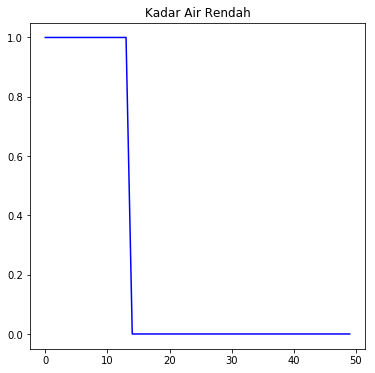

In [121]:
kadar_air_rendah = fuzz.trapmf(kadar_air_x,[0,0,13,14])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kadar_air_x,kadar_air_rendah,'blue')
ax0.set_title('Kadar Air Rendah')

Plotting fungsi keanggotaan $\mu KadarAirSedang(x)$

Text(0.5,1,'Kadar Air Sedang')

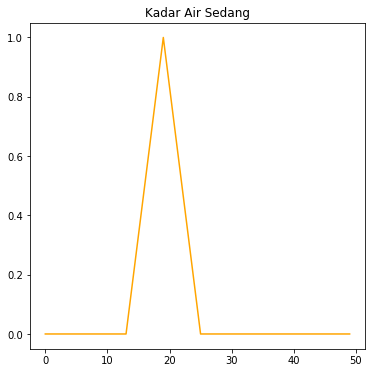

In [122]:
kadar_air_sedang = fuzz.trimf(kadar_air_x,[13,19,25])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kadar_air_x,kadar_air_sedang,'orange')
ax0.set_title('Kadar Air Sedang')

Plotting fungsi keanggotaan $\mu KadarAirTinggi(x)$

Text(0.5,1,'Kadar Air Tinggi')

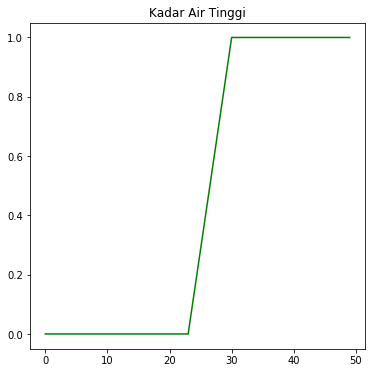

In [123]:
kadar_air_tinggi = fuzz.trapmf(kadar_air_x,[23,30,50,50])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kadar_air_x,kadar_air_tinggi,'green')
ax0.set_title('Kadar Air Tinggi')

C:\Users\Ilham\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


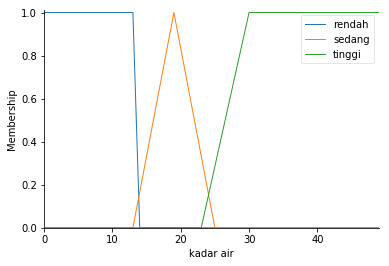

In [124]:
kadar_air.view()

In [125]:
kadar_hampa = ctrl.Antecedent(np.arange(0, 20, 1), 'kadar hampa')
kadar_hampa_x = np.arange(0, 20, 1)

# Fuzzifikasi Kadar Hampa

Untuk kadar hampa, fungsi keanggotaan dibagi menjadi 3 bagian :

Kadar hampa tersebut dinyatakan sedikit ketika mempunyai nilai hampa 0 - 3 %.

Kadar hampa tersebut dinyatakan sedang ketika mempunyai nilai hampa 2 - 6 %.

Kadar hampa tersebut dinyatakan sedang ketika mempunyai nilai hampa 8 - 20 %.

<div class="alert alert-warning">

Dengan fungsi keanggotaan kadar hampa
$$ \mu Sedikit [x] = 
\begin{cases}
    1 & ; x \leq 2\\
    \frac{(3-x)}{(3-1)} & ; 2 \leq  x \leq\ 3 \\
    0 & ; x \geq 3
\end{cases}
$$

$$ \mu Sedang [x] = 
\begin{cases}
    0 & ; x \leq 2\\
    \frac{(x-2)}{(6-2)} & ; 2 \leq x \leq\ 6 \\
    \frac{(10-x)}{(10-6)} & ; 6 \leq  x \leq\ 10 \\
\end{cases}
$$

$$ \mu Banyak [x] = 
\begin{cases}
    0 & ; x \leq 8\\
    \frac{(x-8)}{(12-8)} & ; 8 \leq x \leq\ 12 \\
    1 & ; x \geq 12\\
\end{cases}
$$

In [126]:
kadar_hampa['sedikit'] = fuzz.trapmf(kadar_hampa.universe, [0, 0, 2, 3])
kadar_hampa['sedang'] = fuzz.trimf(kadar_hampa.universe, [2, 6, 10])
kadar_hampa['banyak'] = fuzz.trapmf(kadar_hampa.universe, [8, 12, 20, 20])

### PLOTTING MEMBERSHIP FUNCTION KADAR HAMPA

Plotting fungsi keanggotaan $\mu KadarHampaSedikit(x)$

Text(0.5,1,'Kadar Air Sedikit')

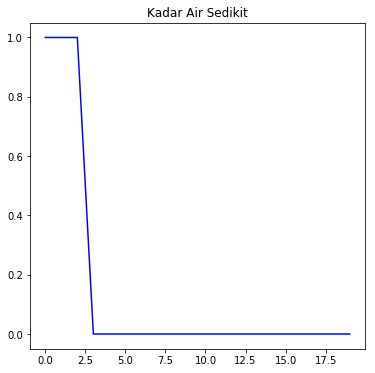

In [127]:
kadar_hampa_sedikit = fuzz.trapmf(kadar_hampa_x,[0,0,2,3])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kadar_hampa_x,kadar_hampa_sedikit,'blue')
ax0.set_title('Kadar Air Sedikit')

Plotting fungsi keanggotaan $\mu KadarHampaSedang(x)$

Text(0.5,1,'Kadar Air Sedang')

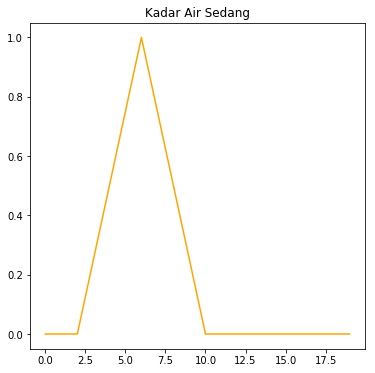

In [128]:
kadar_hampa_sedang = fuzz.trimf(kadar_hampa_x,[2,6,10])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kadar_hampa_x,kadar_hampa_sedang,'orange')
ax0.set_title('Kadar Air Sedang')

Plotting fungsi keanggotaan $\mu KadarHampaBanyak(x)$

Text(0.5,1,'Kadar Air Tinggi')

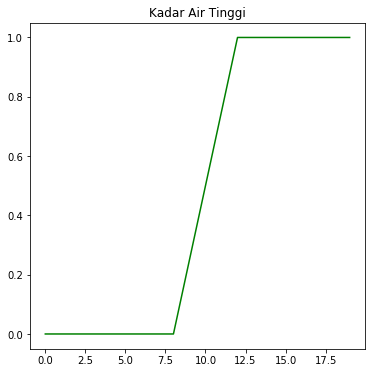

In [129]:
kadar_hampa_banyak = fuzz.trapmf(kadar_hampa_x,[8,12,20,20])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(kadar_hampa_x,kadar_hampa_banyak,'green')
ax0.set_title('Kadar Air Tinggi')

C:\Users\Ilham\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


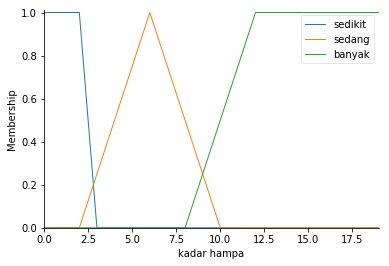

In [130]:
kadar_hampa.view()

In [131]:
harga_kualitas = ctrl.Consequent(np.arange(3500, 5500, 1), 'harga kualitas')
harga_kualitas_x = np.arange(3500, 5500, 1)

### FUZZIFIKASI HARGA KUALITAS

Harga kualitas dibagi menjadi 3 fungsi keanggotaan yakni :
1. Rendah = Rp.3500 - Rp.4100
2. GKP = Rp.4000 - Rp.4700
3. GKG = Rp.4500 - Rp.5000

<div class="alert alert-warning">

Dengan fungsi keanggotaan harga kualitas
$$ \mu Rendah [z] = 
\begin{cases}
    1 & ; z \leq 3750 \\
    \frac{(4100-z)}{(4100-3750)} & ; 3750 \leq  z \leq\ 4100 \\
    0 & ; z \geq 4100 \\
\end{cases}
$$

$$ \mu GKP [z] = 
\begin{cases}
    0 & ; z \leq 4000\\
    \frac{(z-4000)}{(4400-4000)} & ;4000 \leq z \leq\ 4400 \\
    \frac{(4700-z)}{(4700-4400)} & ; 4400 \leq  z \leq\ 4700 \\
    0 & ; z \geq 4500
\end{cases}
$$

$$ \mu GKG [z] = 
\begin{cases}
    0 & ; z \leq 4500\\
    \frac{(z-4500)}{(5000-4500)} & ;4500 \leq z \leq\ 5000 \\
    1 & ; x \geq 5000\\
\end{cases}
$$

In [132]:
harga_kualitas['rendah'] = fuzz.trapmf(harga_kualitas.universe, [3500,3500,3750,4100])
harga_kualitas['gkp'] = fuzz.trimf(harga_kualitas.universe, [4000,4400,4700])
harga_kualitas['gkg'] = fuzz.trapmf(harga_kualitas.universe, [4500, 5000, 5500, 5500])

### PLOTTING MEMBERSHIP FUNCTION HARGA KUALITAS

Plotting fungsi keanggotaan $\mu HargaKualitasRendah(x)$

Text(0.5,1,'Harga Kualitas Rendah')

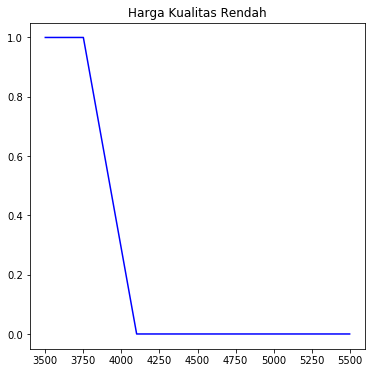

In [133]:
harga_kualitas_rendah = fuzz.trapmf(harga_kualitas_x,[3500,3500,3750,4100])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(harga_kualitas_x,harga_kualitas_rendah,'blue')
ax0.set_title('Harga Kualitas Rendah')

Plotting fungsi keanggotaan $\mu HargaKualitasGKP(x)$

Text(0.5,1,'Harga Kualitas GKP')

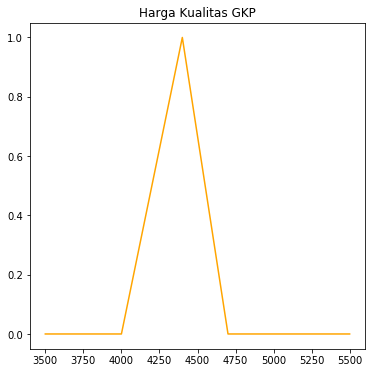

In [134]:
harga_kualitas_gkp = fuzz.trimf(harga_kualitas_x,[4000,4400,4700])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(harga_kualitas_x,harga_kualitas_gkp,'orange')
ax0.set_title('Harga Kualitas GKP')

Plotting fungsi keanggotaan $\mu HargaKualitasGKP(x)$

Text(0.5,1,'Harga Kualitas GKG')

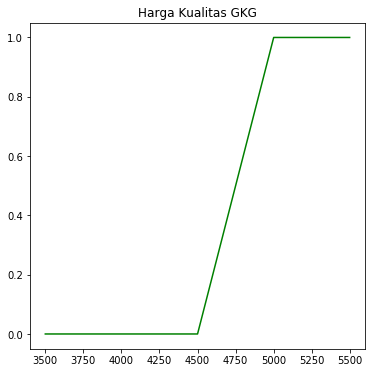

In [135]:
harga_kualitas_gkg = fuzz.trapmf(harga_kualitas_x,[4500,5000,5500,5500])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(harga_kualitas_x,harga_kualitas_gkg,'green')
ax0.set_title('Harga Kualitas GKG')

C:\Users\Ilham\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


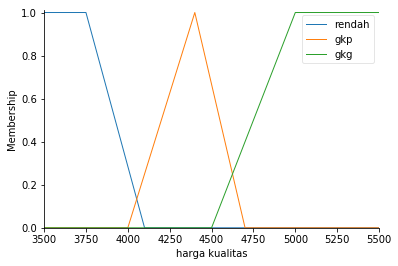

In [136]:
harga_kualitas.view()

### Inferencing
pada tahap inferencing, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF.... THEN....

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel kadar air yang berjumlah 3 dan fuzzifikasi dari variabel kadar hampa yang berjumlah 3, maka rule yang dibuat berjumlah 3 x 3 = 9 rule

1. IF Kadar Air RENDAH dan Kadar Hampa SEDIKIT THEN Harga Kualitas GKG
2. IF Kadar Air RENDAH dan Kadar Hampa SEDANG THEN Harga Kualitas GKP
3. IF Kadar Air RENDAH dan Kadar Hampa BANYAK THEN Harga Kualitas RENDAH
4. IF Kadar Air SEDANG dan Kadar Hampa SEDIKIT THEN Harga Kualitas GKP
5. IF Kadar Air SEDANG dan Kadar Hampa SEDANG THEN Harga Kualitas GKP
6. IF Kadar Air SEDANG dan Kadar Hampa BANYAK THEN Harga Kualitas RENDAH
7. IF Kadar Air TINGGI dan Kadar Hampa SEDIKIT THEN Harga Kualitas RENDAH
8. IF Kadar Air TINGGI dan Kadar Hampa SEDANG THEN Harga Kualitas RENDAH
9. IF Kadar Air TINGGI dan Kadar Hampa BANYAK THEN Harga Kualitas RENDAH

In [137]:
rule1 = ctrl.Rule(kadar_air['rendah'] & kadar_hampa['sedikit'], harga_kualitas['gkg'])
rule2 = ctrl.Rule(kadar_air['rendah'] & kadar_hampa['sedang'], harga_kualitas['gkp'])
rule3 = ctrl.Rule(kadar_air['rendah'] & kadar_hampa['banyak'], harga_kualitas['rendah'])
rule4 = ctrl.Rule(kadar_air['sedang'] & kadar_hampa['sedikit'], harga_kualitas['gkp'])
rule5 = ctrl.Rule(kadar_air['sedang'] & kadar_hampa['sedang'], harga_kualitas['gkp'])
rule6 = ctrl.Rule(kadar_air['sedang'] & kadar_hampa['banyak'], harga_kualitas['rendah'])
rule7 = ctrl.Rule(kadar_air['tinggi'] & kadar_hampa['sedikit'], harga_kualitas['rendah'])
rule8 = ctrl.Rule(kadar_air['tinggi'] & kadar_hampa['sedang'], harga_kualitas['rendah'])
rule9 = ctrl.Rule(kadar_air['tinggi'] & kadar_hampa['banyak'], harga_kualitas['rendah'])

### RULE EVALUATION

In [138]:
harga_kualitas_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

### DEFUZZIFIKASI

In [139]:
nilai = ctrl.ControlSystemSimulation(harga_kualitas_ctrl)

Input kadar air kita masukan 12 dan kadar hampa 2

In [160]:
nilai.input['kadar air'] = 24
nilai.input['kadar hampa'] = 9

Melakukan perhitungan defuzzifikasi

In [161]:
nilai.compute()

Mencetak hasil output defuzzifikasi

In [162]:
print(nilai.output['harga kualitas'])

4087.6604027672884


Plotting fungsi keangggotaan kadar air setelah dimasukkan input nilai pada kadar air

C:\Users\Ilham\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


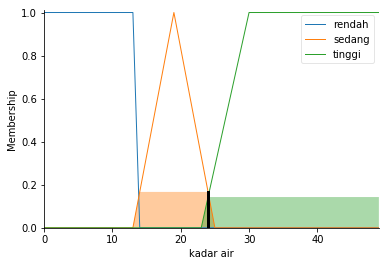

In [163]:
kadar_air.view(sim=nilai)

Plotting fungsi keangggotaan kadar hampa setelah dimasukkan input nilai pada kadar hampa

C:\Users\Ilham\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


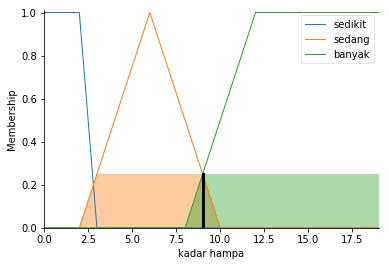

In [164]:
kadar_hampa.view(sim=nilai)

Plotting fungsi keangggotaan harga kualitas setelah dilakukan perhitungan defuzzifikasi output nilai pada harga kualitas

C:\Users\Ilham\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


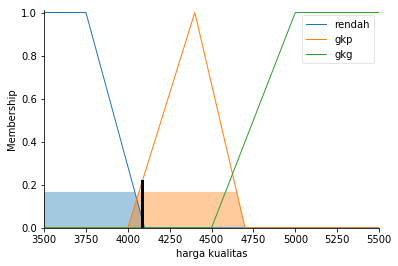

In [165]:
harga_kualitas.view(sim=nilai)

### Perhitungan Manual

\begin{equation}
    Kadar Air = 24 \\
    Masukkan\,nilai\,kadar\,air\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,kadar\,air\\
  kadar\,air['rendah'] = \mu Kadar\,Air\,Rendah(x)=\begin{cases}
    1, & \text{$ x\leq13$}.\\
    (14 - x)/(14 - 13) , & \text{$13 \leq x \leq 14$}.\\
    0, & \text{$x\geq 14 $ }.\checkmark
  \end{cases}
  \\
  kadar\,air['sedang'] = \mu Kadar\,Air\,Sedang(x)=\begin{cases}
    0, & \text{$x\leq 19$}.\\
    (x - 13)/(19 - 13) , & \text{$13 \leq x \leq 19$}.\\
    (25 - 24)/(25 - 19) , & \text{$19 \leq x \leq 25$}.\checkmark\\
  \end{cases}
   \\
    kadar\,air['tinggi'] = \mu Kadar\,Air\,Tinggi(x)=\begin{cases}
    0, & \text{$x\leq 23$}.\\
    (24 - 23)/(30 - 23) , & \text{$23 \leq x \leq 30$}.\checkmark\\
    1, & \text{$x\geq 30$}.
  \end{cases}
\end{equation}



\begin{equation}
    \mu Kadar\,AirSedang(25) = (25-24)/(25-19)\\
    \mu Kadar\,AirSedang(25) = 1/6 \\ 
    \mu Kadar\,AirSedang(25) = 0,17 \\
    \mu Kadar\,AirTinggi(25) = (24 - 23) / (30-23)\\
    \mu Kadar\,AirTinggi(25) = 1/7 \\
    \mu Kadar\,AirTinggi(25) = 0.14 \\
\end{equation}

\begin{equation}
    Kadar Hampa = 9 \\
  kadar\,hampa['sedikit'] = \mu Kadar\,Hampa\,Sedikit(x)=\begin{cases}
    1, & \text{$ x\leq2$}.\\
    (3 - x)/(3 - 2) , & \text{$2 \leq x \leq 3$}.\\
    0, & \text{$x\geq 3 $ }.\checkmark\\
  \end{cases}
  \\
  kadar\,hampa['sedang'] = \mu Kadar\,Air\,Hampa(x)=\begin{cases}
    0, & \text{$x\leq 2$}.\\
    (x - 2)/(6 - 2) , & \text{$2 \leq x \leq 16$}.\\
    (10 - 9)/(10 - 6) , & \text{$6 \leq x \leq 10$}.\checkmark\\
  \end{cases}
   \\
    kadar\,air['banyak'] = \mu Kadar\,Air\,Banyak(x)=\begin{cases}
    0, & \text{$x\leq 8$}.\\
    (9 - 8)/(12 - 8) , & \text{$8 \leq x \leq 12$}.\checkmark\\
    1, & \text{$x\geq 12$}.\\
  \end{cases}
\end{equation}

\begin{equation}
    \mu Kadar\,HampaSedang(9) = (10-9)/(10-6)\\
    \mu Kadar\,HampaSedang(9) = 1/4 \\ 
    \mu Kadar\,HampaSedang(9) = 0,25 \\
    \mu Kadar\,HampaBanyak(9) = (9 - 8) / (12 - 8)\\
    \mu Kadar\,HampaBanyak(9) = 1/4 \\
    \mu Kadar\,HampaBanyak(9) = 0.25 \\
\end{equation}

Lalu kita cari nilai z untuk setiap aturan dengan menggunakan fungsi MIN karena menggunakan rule AND

1 IF Kadar Air RENDAH AND Kadar Hampa SEDIKIT THEN Harga Kualitas GKG 

$$ \\ \alpha(predikat_1) = \mu KadarAirRendah \cap \mu KadarHampaSedikit $$
$$\alpha(predikat_1)   = min (\mu KadarAirRendah[24], \mu KadarHampaSedikit[9]) $$
$$ \alpha(predikat_1) = min (0; 0) $$
$$ \alpha(predikat_1) = 0 $$

Lalu lihat himpunan Kualitas GKG
$$
   kualitas['gkg'] = \mu(x)=\begin{cases}
    0, & \text{$z\leq 4500$}.\\
    \left.(z - 4500)\, \right/(5000 - 4500) , & \text{$4500 \leq z \leq 5000$}.\\
    1, & ; z \geq 5000\\
  \end{cases}
 $$
Maka nilai $ Z_1 = 0 $

=================================================================================================================

2 IF Kadar Air RENDAH AND Kadar Hampa SEDANG THEN Harga Kualitas GKP

$$ \\ \alpha(predikat_2) = \mu KadarAirRendah \cap \mu KadarHampaSedang $$
$$\alpha(predikat_2)   = min (\mu KadarAirRendah[24], \mu KadarHampaSedang[9]) $$
$$ \alpha(predikat_2) = min (0; 0,25) $$
$$ \alpha(predikat_2) = 0 $$

Lalu lihat himpunan Kualitas GKP
$$
  \\
  kualitas['gkp'] = \mu(x)=\begin{cases}
    0, & \text{$z\leq 4000$}.\\
    \left.(z - 4000)\, \right/(4400 - 4000) , & \text{$4000 \leq z \leq 4400$}.\\
    \left.(4700 - z)\, \right/(4700 - 4400) , & \text{$4400 \leq z \leq 4700$}.\\
  \end{cases}
$$

Terdapat 2 nilai keanggotan maka kita uji satu persatu
 $$(z - 4000) / (4400 - 4000) = 0 $$
 $$ z - 4000 = 0 \times 400 $$
 $$ z - 4000 = 0 $$
 $$ z = 4000 $$
 
 $$(4700 - z) / (4700 - 4400) = 0 $$
 $$ 4700 - z = 0 \times 300 $$
 $$ - z = - 4700 $$
 $$ z = 4700 $$
 
Akan di ambil nilai terkecil
Maka nilai $ Z_2 = 4000 $

=================================================================================================================

3 IF Kadar Air RENDAH AND Kadar Hampa BANYAK THEN Harga Kualitas RENDAH

$$ \\ \alpha(predikat_3) = \mu KadarAirRendah \cap \mu KadarHampaBanyak $$
$$\alpha(predikat_3)   = min (\mu KadarAirRendah[24], \mu KadarHampaBanyak[9]) $$
$$ \alpha(predikat_3) = min (0; 0.25) $$
$$ \alpha(predikat_3) = 0.25 $$

Lalu lihat himpunan Harga Kualitas Rendah
$$
  \\
   kualitas['rendah'] = \mu(x)=\begin{cases}
    1, & \text{$z\leq 3750 $}.\\
    \left.(4100 - z)\, \right/(4100 - 3750) , & \text{$3750 \leq z \leq 4100$}.\\
    0, & ; z \geq 4100\\
  \end{cases}
  \\
$$
Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya
 $$ (4100 - z) / (4100 -3750) = 0 $$
 $$ (4100 - z) = 0 $$
 $$ - z = -4100 $$
 $$ z = 4100 $$
 
 
Akan diambil nilai terkecil
Maka nilai $ Z_3 = 4100 $


=================================================================================================================

4 IF Kadar Air SEDANG dan Kadar Hampa SEDIKIT THEN Harga Kualitas GKP

$$ \\ \alpha(predikat_4) = \mu KadarAirSedang \cap \mu KadarHampaSedikit $$
$$\alpha(predikat_4)   = min (\mu KadarAirSedang[24], \mu KadarAirSedikit[9]) $$
$$ \alpha(predikat_4) = min (0.17; 0) $$
$$ \alpha(predikat_4) = 0 $$

Lalu lihat himpunan kualitas GKP
$$ kualitas['GKP'] = \mu(x)=\begin{cases}
    0, & \text{$z \leq 4000$}.\\
    \left.(z - 4000) \,  \right/(4400 - 4000) , & \text{$4400 \leq z \leq 4000$}.\\
    \left.(4700 - z)\, \right/(4700 - 4400) , & \text{$4400 \leq z \leq 4700$}.\\
    0, & ; z \geq 4500\\
  \end{cases}
$$

Terdapat 2 nilai keanggotan maka kita uji satu persatu
 $$(z - 4000) / (4400 - 4000) = 0 $$
 $$ z - 4000 = 0 \times 400 $$
 $$ z - 4000 = 0 $$
 $$ z = 4000 $$
 
 $$(4700 - z) / (4700 - 4400) = 0 $$
 $$ 4700 - z = 0 \times 300 $$
 $$ 4700 - z = 0 $$
 $$ - z = - 4700 $$
 $$ z = 4700 $$
 
Akan diambil nilai terkecil Maka nilai Z$_4$ = 4700 $


=================================================================================================================
5 IF Kadar Air SEDANG dan Kadar Hampa SEDANG THEN Harga Kualitas GKP

$$ \\ \alpha(predikat_5) = \mu KadarAirSedang \cap \mu KadarHampaSedang $$
$$\alpha(predikat_5)   = min (\mu KadarAirSedang[24], \mu KadarHampaSedang[9]) $$
$$ \alpha(predikat_5) = min (0.17; 0.25) $$
$$ \alpha(predikat_5) = 0.17 $$

Lalu lihat himpunan kualitas GKP
$$ kualitas['GKP'] = \mu(x)=\begin{cases}
    0, & \text{$z \leq 4000$}.\\
    \left.(z - 4000) \,  \right/(4400 - 4000) , & \text{$4400 \leq z \leq 4000$}.\\
    \left.(4700 - z)\, \right/(4700 - 4400) , & \text{$4400 \leq z \leq 4700$}.\\
    0, & ; z \geq 4500\\
  \end{cases}
$$

Terdapat 2 nilai keanggotan maka kita uji satu persatu
 $$(z - 4000) / (4400 - 4000) = 0.17 $$
 $$ z - 4000 = 0.17 \times 400 $$
 $$ z - 4000 = 68 $$
 $$ z = 4068 $$
 
 $$(4700 - z) / (4700 - 4400) = 0.17 $$
 $$ 4700 - z = 0.17 \times 300 $$
 $$ 4700 - z = 51 $$
 $$ - z = - 4751 $$
 $$ z = 4751 $$
 
Maka nilai Z$_5$ = 4068 $


=================================================================================================================
6 IF Kadar Air SEDANG dan Kadar Hampa BANYAK THEN Harga Kualitas RENDAH

$$ \\ \alpha(predikat_6) = \mu KadarAirSedang \cap \mu KadarHampaBanyak $$
$$\alpha(predikat_6)   = min (\mu KadarAirSedang[24], \mu KadarHampaBanyak[9]) $$
$$ \alpha(predikat_6) = min (0.17; 0.25) $$
$$ \alpha(predikat_6) = 0.17 $$

Lalu lihat himpunan Harga Kualitas Rendah
$$
  \\
   kualitas['rendah'] = \mu(x)=\begin{cases}
    1, & \text{$z\leq 3750 $}.\\
    \left.(4100 - z)\, \right/(4100 - 3750) , & \text{$3750 \leq z \leq 4100$}.\\
    0, & ; z \geq 4100\\
  \end{cases}
  \\
$$

Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya
 $$ (4100 - z) / (4100 -3750) = 0.17 $$
 $$ 4100 - z = 0.17 \times 350 $$
 $$ 4100 - z = 60 $$
 $$ - z = -4160 $$
 $$ z = 4160 $$
 
Maka nilai Z$_6$ = 4160 $


=================================================================================================================
7 IF Kadar Air TINGGI dan Kadar Hampa SEDIKIT THEN Harga Kualitas RENDAH

$$ \\ \alpha(predikat_7) = \mu KadarAirTinggi \cap \mu KadarHampaSedikit $$
$$\alpha(predikat_7)   = min (\mu KadarAirTinggi[24], \mu KadarHampaSedikit[9]) $$
$$ \alpha(predikat_7) = min (0.14; 0) $$
$$ \alpha(predikat_7) = 0 $$

Lalu lihat himpunan Harga Kualitas Rendah
$$
  \\
   kualitas['rendah'] = \mu(x)=\begin{cases}
    1, & \text{$z\leq 3750 $}.\\
    \left.(4100 - z)\, \right/(4100 - 3750) , & \text{$3750 \leq z \leq 4100$}.\\
    0, & ; z \geq 4100\\
  \end{cases}
  \\
$$

Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya
 $$ (4100 - z) / (4100 -3750) = 0 $$
 $$ 4100 - z = 0 \times 350 $$
 $$ 4100 - z = 0 $$
 $$ - z = -4100 $$
 $$ z = 4100 $$
 
Maka nilai Z$_7$ = 4100 $


=================================================================================================================
8 IF Kadar Air TINGGI dan Kadar Hampa SEDANG THEN Harga Kualitas RENDAH

$$ \\ \alpha(predikat_8) = \mu KadarAirTinggi \cap \mu KadarHampaSedang $$
$$\alpha(predikat_8) = min (\mu KadarAirTinggi[24], \mu KadarHampaSedang[9]) $$
$$ \alpha(predikat_8) = min (0.14; 0.25) $$
$$ \alpha(predikat_8) = 0 $$

Lalu lihat himpunan Harga Kualitas Rendah
$$
  \\
   kualitas['rendah'] = \mu(x)=\begin{cases}
    1, & \text{$z\leq 3750 $}.\\
    \left.(4100 - z)\, \right/(4100 - 3750) , & \text{$3750 \leq z \leq 4100$}.\\
    0, & ; z \geq 4100\\
  \end{cases}
  \\
$$

Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya
 $$ (4100 - z) / (4100 -3750) = 0.14 $$
 $$ 4100 - z = 0.14 \times 350 $$
 $$ 4100 - z = 49 $$
 $$ - z = -4149 $$
 $$ z = 4149 $$
 
Maka nilai Z$_8$ = 4149 $


=================================================================================================================
9 IF Kadar Air TINGGI dan Kadar Hampa BANYAK THEN Harga Kualitas RENDAH

$$ \\ \alpha(predikat_9) = \mu KadarAirTinggi \cap \mu KadarHampabanyak $$
$$\alpha(predikat_9) = min (\mu KadarAirTinggi[24], \mu KadarHampaBanyak[9]) $$
$$ \alpha(predikat_9) = min (0.14; 0.25) $$
$$ \alpha(predikat_9) = 0 $$

Lalu lihat himpunan Harga Kualitas Rendah
$$
  \\
   kualitas['rendah'] = \mu(x)=\begin{cases}
    1, & \text{$z\leq 3750 $}.\\
    \left.(4100 - z)\, \right/(4100 - 3750) , & \text{$3750 \leq z \leq 4100$}.\\
    0, & ; z \geq 4100\\
  \end{cases}
  \\
$$

Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya
 $$ (4100 - z) / (4100 -3750) = 0.14 $$
 $$ 4100 - z = 0.14 \times 350 $$
 $$ 4100 - z = 49 $$
 $$ - z = -4149 $$
 $$ z = 4149 $$
 
Maka nilai Z$_9$ = 4149 $


=================================================================================================================

Dari sini kita dapat mencari nilai z, yaitu :

Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 +}
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9}$$

 $$Z = \frac{0 + 0 + 0 + 0.25 \times 4100 + 0 + 0.17 \times 4068 + 0.17 \times 4160 + 0 + 0 + 0}{0 + 0 + 0.25 + 0 + 0.17 + 0.17 + 0 + 0 + 0} $$
 
 $$ Z = \frac{1025 + 692 + 707}{0.59} $$
 $$ Z = 4108 $$

Hasil output yang dikeluarkan menggunakan code python sebesar 4087 rupiah  sedangkan perhitungan manual sebesar 4108 rupiah.
Terdapat perbedaan sebesar 21 rupiah